In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Carga del Dataset:
# Carga el dataset proporcionado sobre cafe en un DataFrame de pandas.
dataset = pd.read_csv('/content/arabica_coffee_full_table.csv')
print(dataset)

     coffee_id Country_of_Origin                      Farm_Name  \
0      #647123         Guatemala           san francisco cotzal   
1      #927000         Guatemala              San jose del lago   
2      #902618         Guatemala                  varias fincas   
3      #781706         Guatemala              San jose del lago   
4      #237025         Guatemala                 Finca Alta Luz   
...        ...               ...                            ...   
1504   #241548          Ethiopia                  Gelana Geisha   
1505   #510790          Ethiopia  Bisrat Melaku Washing Station   
1506   #611011          Ethiopia   Uraga Bisrat washing station   
1507   #917098          Ethiopia                    Eshetu farm   
1508   #106719              Laos      Nongluang Bolaven Plateau   

                                 Lot_Number  \
0                                 11/441/50   
1                                  11/15/95   
2                                  11/15/51   
3      

In [ ]:
# Crea una máscara booleana para las filas donde el país es 'Colombia'.
mask = dataset['Country_of_Origin'] == 'Colombia'

# Crea un nuevo DataFrame usando la máscara.
colombia_lista = dataset[mask]

# Muestra el nuevo DataFrame.
print(colombia_lista)

     coffee_id Country_of_Origin         Farm_Name  \
20     #858598          Colombia             N / A   
21     #329719          Colombia      La fortaleza   
22     #449544          Colombia          EL PRADO   
23     #882894          Colombia             Huila   
25     #274853          Colombia               NaN   
...        ...               ...               ...   
1494   #138975          Colombia      Buenos Aires   
1496   #367114          Colombia       El Diamante   
1497   #270359          Colombia   Finca Santuario   
1498   #261473          Colombia  Finca El Paraiso   
1501   #689252          Colombia      La Argentina   

                        Lot_Number                       Mill    ICO_Number  \
20                    3-0068-00886         Trilladora Popayán  3-0068-00886   
21    3-0104-00202 Popayán Supremo         Trilladora Pubenza  3-0104-00202   
22                       3-59-0654                      NEIVA     3-59-0654   
23                    3-0960-00750 

In [ ]:
# 2. Revisión General de los Datos:
print(colombia_lista.info())
print("///////////////////////")
# Imprime las primeras 5 filas del dataset.
print(colombia_lista.head())
# Usa .info() y .describe() para entender mejor la estructura y las estadísticas básicas.
print("///////////////////////")
print(colombia_lista.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 20 to 1501
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   coffee_id              202 non-null    object 
 1   Country_of_Origin      202 non-null    object 
 2   Farm_Name              33 non-null     object 
 3   Lot_Number             51 non-null     object 
 4   Mill                   141 non-null    object 
 5   ICO_Number             188 non-null    object 
 6   Company                173 non-null    object 
 7   Altitude               168 non-null    float64
 8   Region                 192 non-null    object 
 9   Producer               111 non-null    object 
 10  Number_of_Bags         202 non-null    int64  
 11  Bag_Weight             202 non-null    object 
 12  In_Country_Partner     202 non-null    object 
 13  Harvest_Year           197 non-null    object 
 14  Grading_Date           202 non-null    object 
 15  Owner    

In [ ]:
# 3. Búsqueda y Eliminación de Duplicados:
# Verifica si hay filas duplicadas en el dataset utilizando el método .duplicated().
# Si se encuentran duplicados, elimínalos con .drop_duplicates() y verifica cuántos duplicados fueron eliminados.

duplicados = colombia_lista.duplicated().sum()
print("Hay", duplicados, "registros duplicados")

Hay 0 registros duplicados


In [ ]:
# 4. Identificación de Valores Nulos:

# Identifica qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.
valores_faltantes = colombia_lista.isnull().sum()
print(valores_faltantes)

coffee_id                  0
Country_of_Origin          0
Farm_Name                169
Lot_Number               151
Mill                      61
ICO_Number                14
Company                   29
Altitude                  34
Region                    10
Producer                  91
Number_of_Bags             0
Bag_Weight                 0
In_Country_Partner         0
Harvest_Year               5
Grading_Date               0
Owner                      1
Variety                   45
Status                   183
Processing_Method         37
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean_Cup                  0
Sweetness                  0
Overall                    0
Defects                  183
Total_Cup_Points           0
Moisture                   0
Color                     49
Category_One_Defects       0
Category_Two_D

In [ ]:
#5. Visualización de Variables:

# Crea un histograma que muestre la distribución de la variable imdb_score.
# Realiza un gráfico de barras para visualizar la cantidad de películas por género (genres).
print(colombia_lista['Overall'])

20      7.58
21      7.58
22      7.33
23      7.75
25      7.67
        ... 
1494    7.50
1496    8.00
1497    8.25
1498    8.58
1501    7.58
Name: Overall, Length: 202, dtype: float64


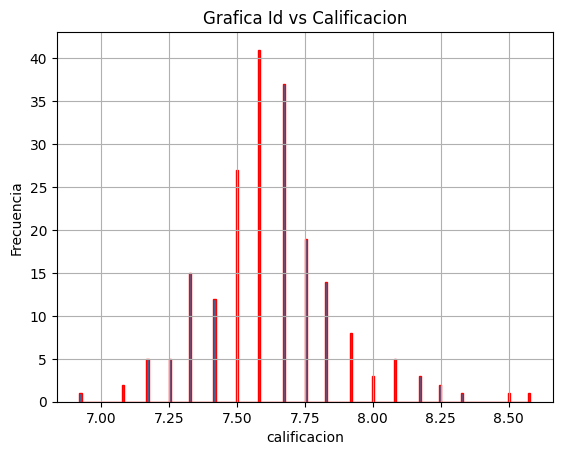

In [ ]:
overall=colombia_lista['Overall']

# Crear el histograma
plt.hist(overall, bins=202, edgecolor='red')
plt.title('Grafica Id vs Calificacion')
plt.xlabel('calificacion')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Crear un gráfico de barras
overall=colombia_lista['overall']
grouper = colombia_lista.groupby('overall')
grouped_data = grouper.size()
plt.bar(grouped_data.index ,colombia_lista['coffee_id'], grouped_data.values)
plt.title("Grafica Id vs Calificacion")
plt.xlabel("calificacion")
plt.ylabel("id")
plt.show()

KeyError: 'overall'

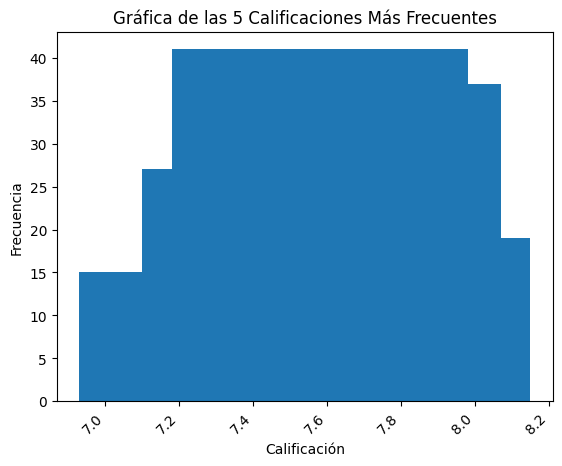

In [ ]:

# ... (Your existing code to load and process the data) ...

overall = colombia_lista['Overall']

# Contar la frecuencia de cada valor en 'overall'
conteo_overall = overall.value_counts()

# Seleccionar los 5 valores principales
top_5_overall = conteo_overall.head(5)

# Crear un gráfico de barras con etiquetas en español
plt.bar(top_5_overall.index, top_5_overall.values)
plt.title("Gráfica de las 5 Calificaciones Más Frecuentes")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()


In [ ]:
# 6. Análisis de Correlaciones:

# Calcula y muestra la correlación entre budget, gross y imdb_score.
# Usa un mapa de calor para visualizar las correlaciones.
